In [2]:
# Install gdown jika belum ada
!pip install gdown

# File ID dan nama output
file_id = '1lCddfxYMkhl81HVmz7VOanrg6Hm118QD'
output_file = 'Dataset.zip'

# Generate link download
download_link = f'https://drive.google.com/uc?id={file_id}'

# Download file
!gdown $download_link -O $output_file


Downloading...
From (original): https://drive.google.com/uc?id=1lCddfxYMkhl81HVmz7VOanrg6Hm118QD
From (redirected): https://drive.google.com/uc?id=1lCddfxYMkhl81HVmz7VOanrg6Hm118QD&confirm=t&uuid=ecdf8926-7376-47d1-b13a-ce297a7f9307
To: /kaggle/working/Dataset.zip
100%|█████████████████████████████████████████| 115M/115M [00:00<00:00, 164MB/s]


In [3]:
!unzip /kaggle/working/Dataset.zip

Archive:  /kaggle/working/Dataset.zip
   creating: dataset warna/
   creating: dataset warna/test/
   creating: dataset warna/test/black/
  inflating: dataset warna/test/black/81.jpeg  
  inflating: dataset warna/test/black/82.jpeg  
  inflating: dataset warna/test/black/83.jpeg  
  inflating: dataset warna/test/black/84.jpeg  
  inflating: dataset warna/test/black/85.jpeg  
  inflating: dataset warna/test/black/86.jpeg  
  inflating: dataset warna/test/black/87.jpeg  
  inflating: dataset warna/test/black/88.jpeg  
  inflating: dataset warna/test/black/89.jpeg  
  inflating: dataset warna/test/black/90.jpeg  
  inflating: dataset warna/test/black/91.jpeg  
  inflating: dataset warna/test/black/92.jpeg  
  inflating: dataset warna/test/black/93.jpeg  
  inflating: dataset warna/test/black/94.jpeg  
  inflating: dataset warna/test/black/95.jpeg  
   creating: dataset warna/test/blue/
  inflating: dataset warna/test/blue/81.jpg  
  inflating: dataset warna/test/blue/82.jpg  
  inflating:

In [4]:
import os

import numpy as np

import tensorflow as tf

import tensorflow_hub as hub

import matplotlib.pyplot as plt

from tensorflow.keras.utils import load_img, img_to_array

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = "/kaggle/working/dataset warna/train"

test_dir = "/kaggle/working/dataset warna/test"

validation_dir = "/kaggle/working/dataset warna/valid"



sorted_labels = [

    'black', 'blue', 'brown', 'green', 'oranye', 'pink', 'purple', 'red', 'white','yellow'

]



# train directories

train_directories = {label: os.path.join(train_dir, label) for label in sorted_labels}



test_directories = {label: os.path.join(test_dir, label) for label in sorted_labels}



# validation directories

validation_directories = {label: os.path.join(validation_dir, label) for label in sorted_labels}



for label in sorted_labels:

    print('Total training', label, 'images:', len(os.listdir(train_directories[label])))



for label in sorted_labels:

    print('Total test', label, 'images:', len(os.listdir(test_directories[label])))



for label in sorted_labels:

    print('Total validation', label, 'images:', len(os.listdir(validation_directories[label])))





Total training black images: 65
Total training blue images: 64
Total training brown images: 70
Total training green images: 70
Total training oranye images: 63
Total training pink images: 61
Total training purple images: 65
Total training red images: 64
Total training white images: 65
Total training yellow images: 68
Total test black images: 15
Total test blue images: 15
Total test brown images: 16
Total test green images: 18
Total test oranye images: 14
Total test pink images: 16
Total test purple images: 13
Total test red images: 12
Total test white images: 15
Total test yellow images: 14
Total validation black images: 15
Total validation blue images: 15
Total validation brown images: 15
Total validation green images: 15
Total validation oranye images: 14
Total validation pink images: 14
Total validation purple images: 16
Total validation red images: 13
Total validation white images: 15
Total validation yellow images: 14


In [6]:

# Feature extractor layer
feature_extractor_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=[224, 224, 3])

# Freeze the feature extractor layer
feature_extractor_layer.trainable = False




In [28]:
# Model

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(224, 224, 3)),  # Gunakan "shape" sebagai pengganti "input_shape"
    tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),
    tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,363,146 (9.01 MB)

 Trainable params: 2,363,146 (9.01 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer= optimizer,

              loss= 'categorical_crossentropy',

              metrics= ['accuracy'])

In [30]:
# Add data-augmentation parameters to ImageDataGenerator
from PIL import Image


train_datagen = ImageDataGenerator(rescale= 1./255,

                                   rotation_range= 90,

                                   width_shift_range= 0.3,

                                   height_shift_range= 0.3,

                                   shear_range= 0.3,

                                   zoom_range= 0.3,

                                   horizontal_flip= True,
                                   vertical_flip= True,

                                   fill_mode= 'nearest')




train_generator = train_datagen.flow_from_directory(train_dir,

                                                    batch_size= 32,

                                                    class_mode= 'categorical',

                                                    target_size= (224, 224))



validation_datagen = ImageDataGenerator(rescale = 1./255)



validation_generator = validation_datagen.flow_from_directory(validation_dir,

                                                    batch_size= 32,

                                                    class_mode= 'categorical',

                                                    target_size= (224, 224))

Found 655 images belonging to 10 classes.
Found 146 images belonging to 10 classes.


In [ ]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None and logs.get('accuracy') > 0.9:  # Periksa accuracy
            print("\nReached 90% training accuracy, so cancelling training!")
            self.model.stop_training = True


callbacks = Callback()


history = model.fit(
    train_generator,
    epochs=45,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callbacks]
)


Epoch 1/45
21/21 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.1874 - loss: 14.7332 - val_accuracy: 0.1438 - val_loss: 10.5383
Epoch 2/45
21/21 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.3251 - loss: 9.2558 - val_accuracy: 0.1986 - val_loss: 7.5762
Epoch 3/45
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.4136 - loss: 6.6208 - val_accuracy: 0.1849 - val_loss: 5.9837
Epoch 4/45
10/21 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5249 - loss: 5.2147

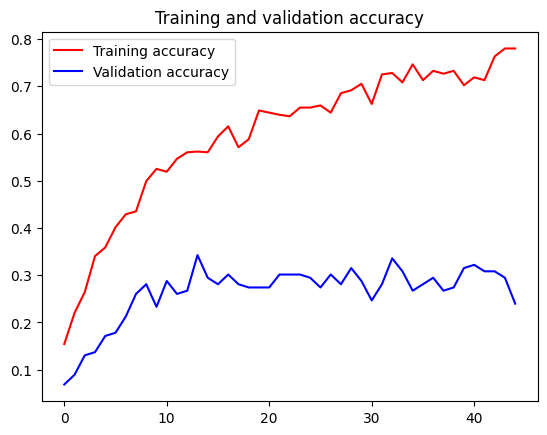

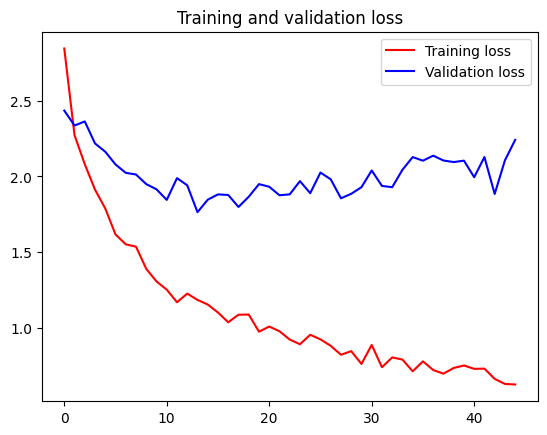

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot the results

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']



epochs = range(len(acc))



# Plot the accuracy

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')

plt.legend(loc=0)

plt.figure()



# Plot the loss

plt.plot(epochs, loss, 'r', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend(loc=0)

plt.figure()



plt.show()

In [19]:
from tensorflow.keras.preprocessing import image

# List untuk label yang sudah terurut (sorted_labels harus sudah didefinisikan)
sorted_labels = sorted(os.listdir(test_dir))  # Mendapatkan label berdasarkan nama folder

# Untuk setiap label di direktori test
for label in sorted_labels:
    folder = os.path.join(test_dir, label)

    # Pastikan folder ada dan memiliki file
    if os.path.isdir(folder):
        for path_file in os.listdir(folder):
            path_file = os.path.join(folder, path_file)
            
            # Pastikan file tersebut adalah gambar (dengan ekstensi .jpg atau .png)
            if path_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Memuat gambar dan mengubah ukurannya
                img = image.load_img(path_file, target_size=(512, 512))

                # Mengonversi gambar ke array
                x = img_to_array(img)
                x = x / 255.0  # Normalisasi gambar
                x = np.expand_dims(x, axis=0)  # Menambahkan dimensi batch

                # Melakukan prediksi
                predictions = model.predict(x)

                # Mengambil indeks kelas dengan probabilitas tertinggi
                predicted_class_index = np.argmax(predictions)

                # Mengonversi indeks kelas ke label
                predicted_label = sorted_labels[predicted_class_index]

                # Menampilkan hasil prediksi
                print(f"Image: {path_file}, True Label: {label}, Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: /kaggle/working/dataset warna/test/black/88.jpeg, True Label: black, Predicted Label: black
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Image: /kaggle/working/dataset warna/test/black/85.jpeg, True Label: black, Predicted Label: black
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Image: /kaggle/working/dataset warna/test/black/94.jpeg, True Label: black, Predicted Label: white
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Image: /kaggle/working/dataset warna/test/black/87.jpeg, True Label: black, Predicted Label: black
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
Image: /kaggle/working/dataset warna/test/black/83.jpeg, True Label: black, Predicted Label: white
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Image: /kaggle/working/dataset warna/test/black/90.jpeg, True Label: black, Predicted Label: black
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Image: /kaggle/working/dataset warna/test/black/92.jpeg, True Label: black, Predicted Label: black
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/ste

In [24]:
# Save the model

model.save("Model.h5")

In [ ]:
# Move the saved model to Google Drive

from google.colab import drive

drive.mount('/content/gdrive')



import shutil



local_file_path = '/content/Model.h5'

drive_path = '/content/gdrive/My Drive/'



shutil.copy(local_file_path, drive_path)